Task 1 : To create a bar chart or histogram to visualize the distribution of a categorical or continuous variable such as the distribution of ages or genders in a population.

In [4]:
#step 1: Load data from world bank

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load World Bank total population CSV
df = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_131993.csv', skiprows=4)

# Clean and filter
df = df[['Country Name', 'Country Code'] + [str(year) for year in range(2000, 2022)]]
df.set_index('Country Name', inplace=True)
df = df.dropna()
df.head()

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,90588.0,91439.0,92074.0,93128.0,95138.0,97635.0,99405.0,100150.0,100917.0,...,104110.0,105675.0,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0
Africa Eastern and Southern,AFE,406156661.0,416807868.0,427820358.0,439173286.0,450928044.0,463076637.0,475606210.0,488580707.0,502070763.0,...,559609961.0,575202699.0,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0
Afghanistan,AFG,20130327.0,20284307.0,21378117.0,22733049.0,23560654.0,24404567.0,25424094.0,25909852.0,26482622.0,...,30560034.0,31622704.0,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0
Africa Western and Central,AFW,274968446.0,282780717.0,290841795.0,299142845.0,307725100.0,316588476.0,325663158.0,334984176.0,344586109.0,...,385360349.0,396030207.0,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0
Angola,AGO,16194869.0,16747208.0,17327699.0,17943712.0,18600423.0,19291161.0,20015279.0,20778561.0,21578655.0,...,25177394.0,26165620.0,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0


<ipython-input-5-38dd266f426c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


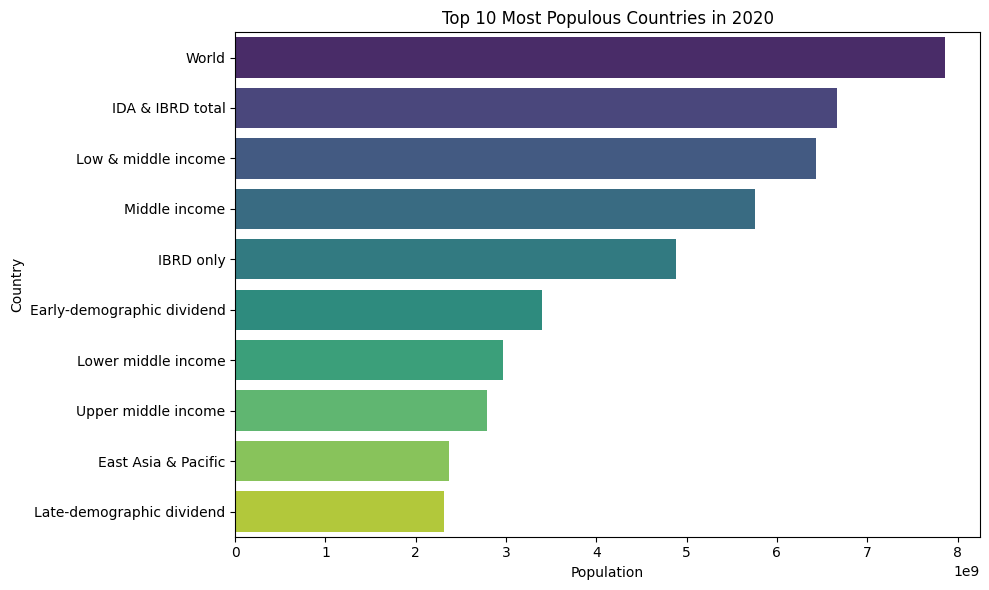

In [5]:
#Step 2: Static Visualization - Bar Chart of 2020 Population

top10 = df['2020'].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title("Top 10 Most Populous Countries in 2020")
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [6]:
#Step 3: Interactive Visualization (Plotly)

# Interactive line chart for population trend
countries = ['India', 'China', 'United States', 'Indonesia', 'Brazil']
data = df.loc[countries].transpose().reset_index().rename(columns={'index': 'Year'})

fig = px.line(data, x='Year', y=countries, title='Population Over Time (2000–2021)')
fig.show()

In [8]:
#Step 4: Add Filters and Export Option (Streamlit)

# streamlit_app.py
!pip install streamlit

import streamlit as st

st.title("Global Population Dashboard")
country = st.selectbox("Select Country", df.index)

st.subheader(f"Population Trend of {country}")
years = [str(year) for year in range(2000, 2022)]
st.line_chart(df.loc[country, years])

# Export button
csv = df.loc[country, years].to_csv().encode('utf-8')
st.download_button("Download Country Data as CSV", csv, f"{country}_population.csv", "text/csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


2025-05-20 18:23:24.687 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.894 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-20 18:23:24.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-20 18:23:24.909 Session state does not 

False